<a href="https://colab.research.google.com/github/LibbyFender/Learning/blob/master/SPEX650.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

American University
SPEX 650 Quantitative Analysis
May - June 2020

Ticket Time Machine Research

In [1]:
#Library imports and loading data (5/27/2020)
import pandas as pd
from sklearn import linear_model
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import seaborn as sns
sns.set_style('ticks')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Task complete 5/30/20
To-do List, connect google results directly to this form. It is currently from local .csv
df = pd.read_csv('/Survey_1Responses.csv')
/Survey_1Responses.csv  /content/drive/My Drive/Survey_1Responses.gsheet

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())


Load dataframe from google workbook 5/30

In [0]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1IsoWdpWEF8C3DMWTsGHWdDE30vjYUEagPq-sx7UzhU4/edit#gid=1758253341')

In [0]:
sheet = wb.worksheet('Form Responses 1')
data = sheet.get_all_values()
df = pd.DataFrame(data)

In [31]:
df.head()

,quizTaken,age,zip,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir,event_att,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust,when_cust,open
0,5/26/2020 22:19:45,35-44,98056,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,Agree,Agree,7-9,Often,Often,Often,Always,Some events,Often,Some events,Rarely,Some events,Some events,Rarely,"First Date, Rivalry Game, testing","This is Libby, testing the form and feedback!"
1,5/26/2020 22:58:21,25-34,0,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,Strongly Agree,Agree,13 or more.,Often,Rarely,Rarely,Often,Never,Rarely,Some events,Rarely,Rarely,Never,Never,NaN,NaN
2,5/26/2020 23:28:55,35-44,83712,Disagree,Agree,Strongly Disagree,Agree,Neither Agree nor Disagree,Disagree,0 - 1,Never,Never,Never,Never,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Rarely,Enlightening or life changing experience,NaN
3,5/26/2020 23:47:14,45-54,98056,Strongly Agree,Agree,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,2-3,Never,Rarely,Rarely,Some events,Never,Some events,Some events,Rarely,Rarely,Never,Never,"First Concert, game or event, Family Vacation,...",You are swell!
4,5/27/2020 0:41:30,35-44,98404,Agree,Neither Agree nor Disagree,Agree,Agree,Agree,Agree,4-6,Rarely,Rarely,Rarely,Rarely,Never,Rarely,Never,Never,Never,Never,Never,"First Concert, game or event, Family Vacation,...",NaN


5/30/20 Update: when connecting directly from gsheet, column names become first row of data. I will need to either research how to ID column names directly in google sheet, or correct here.

5/28 note: Updating column names for ease of use. Current column names are questions from survey.
5/30 note: not ideal method for a google sheet.

In [0]:
columns = ['quizTaken', 'age', 'zip', 'enjoy_music', 'enjoy_sports', 'enjoy_outdoor', 'enjoy_culture', 'enjoy_performances', 'buy_souvenir', 'event_att', 'save_stub', 'prefer1', 'prefer2', 'want_printed', 'buy_printed', 'ps_printed', 'ps_cust', 'ts_printed', 'ts_cust','na_printed', 'na_cust', 'when_cust', 'open']
df = df.iloc[1:]

In [11]:
print(len(columns), len(df.columns))

23 23


Load dataframe from local .csv

In [0]:
df = pd.read_csv('Survey_1Responses.csv')
# /Survey_1Responses.csv /content/drive/My Drive/Survey_1Responses.gsheet

In [0]:
df.columns =columns

In [24]:
df.head(3)

,quizTaken,age,zip,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances,buy_souvenir,event_att,save_stub,prefer1,prefer2,want_printed,buy_printed,ps_printed,ps_cust,ts_printed,ts_cust,na_printed,na_cust,when_cust,open
0,5/26/2020 22:19:45,35-44,98056.0,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,Agree,Agree,7-9,Often,Often,Often,Always,Some events,Often,Some events,Rarely,Some events,Some events,Rarely,"First Date, Rivalry Game, testing","This is Libby, testing the form and feedback!"
1,5/26/2020 22:58:21,25-34,NaN,Strongly Agree,Strongly Agree,Agree,Neither Agree nor Disagree,Strongly Agree,Agree,13 or more.,Often,Rarely,Rarely,Often,Never,Rarely,Some events,Rarely,Rarely,Never,Never,NaN,NaN
2,5/26/2020 23:28:55,35-44,83712.0,Disagree,Agree,Strongly Disagree,Agree,Neither Agree nor Disagree,Disagree,0 - 1,Never,Never,Never,Never,Never,Rarely,Rarely,Rarely,Rarely,Rarely,Rarely,Enlightening or life changing experience,NaN


In [25]:
#5/28 Notes As expected, zip is a float, all other items are object types. We need to change to numerical values and address null value in zip code.
df.info()
#5/30 Notes: when loaded from a google sheet, null values are not flagged as null, and all items, including zip code are object type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   quizTaken           27 non-null     object 
 1   age                 27 non-null     object 
 2   zip                 26 non-null     float64
 3   enjoy_music         27 non-null     object 
 4   enjoy_sports        26 non-null     object 
 5   enjoy_outdoor       27 non-null     object 
 6   enjoy_culture       26 non-null     object 
 7   enjoy_performances  26 non-null     object 
 8   buy_souvenir        26 non-null     object 
 9   event_att           27 non-null     object 
 10  save_stub           26 non-null     object 
 11  prefer1             26 non-null     object 
 12  prefer2             26 non-null     object 
 13  want_printed        26 non-null     object 
 14  buy_printed         26 non-null     object 
 15  ps_printed          27 non-null     object 
 16  ps_cust   

In [26]:
print(df.zip.describe(), df.zip.sum())
#Min and Max suggest acceptable range. Sum is a whole number, which suggests whole numbers.
#5/30 Note, because zip now an object, the sum combines them like a string. This code does not make sense after adjusting to sheet upload.

count       26.000000
mean     85531.846154
std      24363.379011
min      33434.000000
25%      91350.500000
50%      98075.000000
75%      98363.500000
max      99336.000000
Name: zip, dtype: float64 2223828.0


In [33]:
print(len(df.quizTaken), df.quizTaken.max())

27 5/28/2020 7:30:27


In [0]:
df.zip.fillna('00000', inplace=True)

In [0]:
df['zip'] = df.zip.astype(int)

In [34]:
df.info()
#I'm thinking more about this... Zip codes are categorial, not integers. They hold no rank, but lower number is East Coast and higher number is West coast.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   quizTaken           27 non-null     object
 1   age                 27 non-null     object
 2   zip                 27 non-null     int64 
 3   enjoy_music         27 non-null     object
 4   enjoy_sports        26 non-null     object
 5   enjoy_outdoor       27 non-null     object
 6   enjoy_culture       26 non-null     object
 7   enjoy_performances  26 non-null     object
 8   buy_souvenir        26 non-null     object
 9   event_att           27 non-null     object
 10  save_stub           26 non-null     object
 11  prefer1             26 non-null     object
 12  prefer2             26 non-null     object
 13  want_printed        26 non-null     object
 14  buy_printed         26 non-null     object
 15  ps_printed          27 non-null     object
 16  ps_cust             26 non-n

In [30]:
df.groupby('age').agg('count').iloc[:, 2:6]
#Our target market is 25-54, and we have 17 responses (5/27) in that range. (-1 that is mine for testing purposes) This is good news for us. Course requirements are met.
#5/30 update: 23 responses in our target market

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture
age,,,,
25-34,6,6,6,6
35-44,10,10,10,10
45-54,7,7,7,7
55-64,2,1,2,1
65+,2,2,2,2


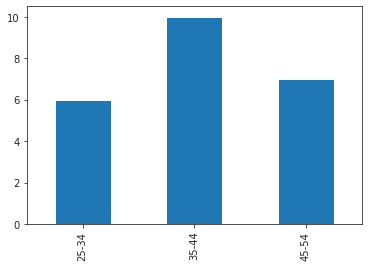

In [37]:
age_bins = ['25-34', '35-44', '45-54']
df.age.value_counts().loc[age_bins].plot(kind='bar')

I'm just playing around, and unlikely to keep most of this:

In [0]:
age_group = df.groupby('age').agg('count').iloc[:, 2:7]

In [0]:
age_group

,enjoy_music,enjoy_sports,enjoy_outdoor,enjoy_culture,enjoy_performances
age,,,,,
25-34,5,5,5,5,5
35-44,7,7,7,7,7
45-54,5,5,5,5,5
55-64,1,1,1,1,1
65+,1,1,1,1,1


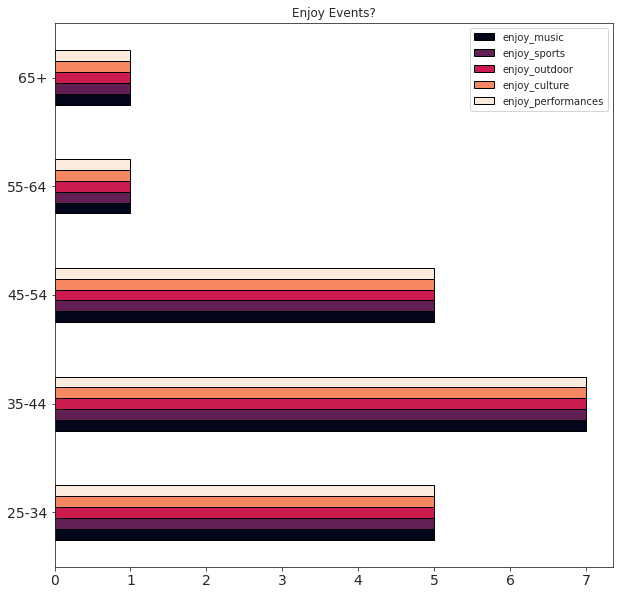

In [0]:
age_group.plot(
    kind='barh',
    figsize=(10, 10),
    cmap='rocket',
    edgecolor='black',
    fontsize=14,
    title='Enjoy Events?'
    ).yaxis.label.set_visible(False)

This I expect to keep!!

In [0]:
#Creating a replicable framework for graphing our results
#order = ['Strongly Agree', 'Agree',	'Neither Agree nor Disagree', 'Disagree', 'Strongly Disagree' ]

def plot_test(data, ques_name, age_bin, order = order, ax=None):
  plot_df = data[[ques_name, 'age']]
#frequency for each age group
  plotting_data = plot_df[plot_df['age'] == age_bin][ques_name].value_counts()
  sns.barplot(y =plot_df.index,
              x= plot_df.values,
              order=order,
              ax = ax,
              palette = 'Spectral',
              edgecolor ='black'
              ).set_title("Age")

In [0]:
#plot_test(df, 'enjoy_music', '25-34')

In [51]:
#Object datatype
sns.catplot(x='age', y='enjoy_music', hue= likert_order, data=df)

ValueError: ignored

##5/28 Data Cleaning with 2nd round of data collection

In [38]:
df['age'].value_counts()

35-44    10
45-54     7
25-34     6
55-64     2
65+       2
Name: age, dtype: int64

In [39]:
df['enjoy_music'].describe()

count                 27
unique                 5
top       Strongly Agree
freq                  14
Name: enjoy_music, dtype: object

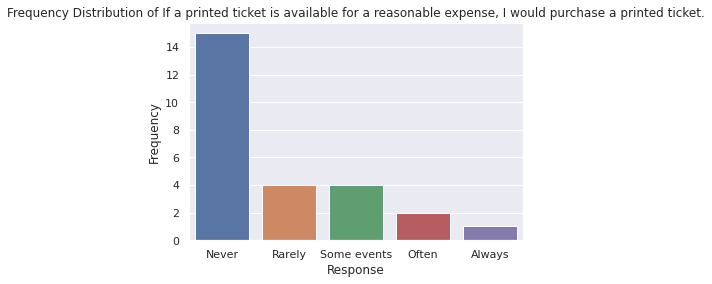

In [40]:
buy_printed = df['buy_printed'].value_counts()
sns.set(style='darkgrid')
sns.barplot(buy_printed.index, buy_printed.values)
plt.title('Frequency Distribution of If a printed ticket is available for a reasonable expense, I would purchase a printed ticket.')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Response', fontsize=12)
plt.show()

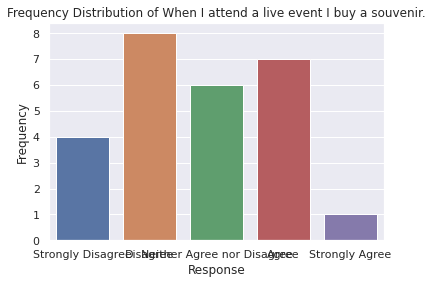

In [57]:
likert_order=['Strongly Disagree', 'Disagree', 'Neither Agree nor Disagree', 'Agree', 'Strongly Agree']
buy_printed = df['buy_souvenir'].value_counts().loc[likert_order]
sns.set(style='darkgrid')
sns.barplot(buy_printed.index, buy_printed.values)
plt.title('Frequency Distribution of When I attend a live event I buy a souvenir.')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Response', fontsize=12)
plt.show()

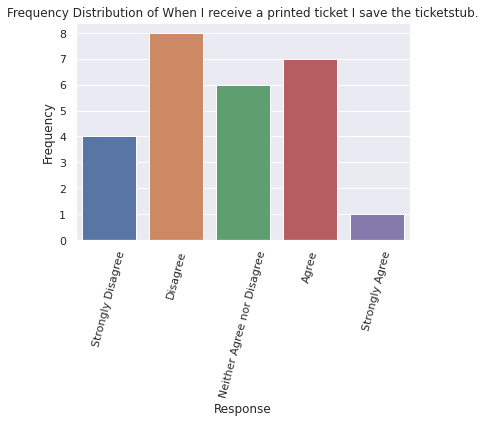

In [69]:
likert_2 = ['Never', 'Rarely', 'Some events', 'Often', 'Always']
save_stub = df['save_stub'].value_counts().loc[likert_2]
sns.set(style='darkgrid')
sns.barplot(buy_printed.index, buy_printed.values)
plt.title('Frequency Distribution of When I receive a printed ticket I save the ticketstub.')
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Response', fontsize=12)
plt.xticks(rotation = 75)
plt.show()


In [58]:
likert_order

['Strongly Disagree',
 'Disagree',
 'Neither Agree nor Disagree',
 'Agree',
 'Strongly Agree']

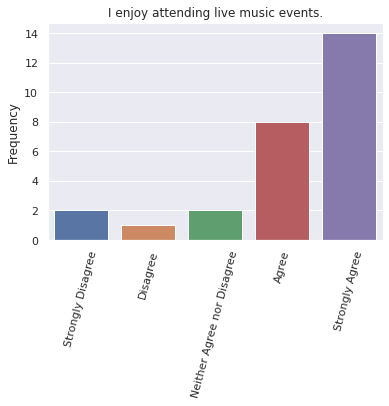

In [72]:
enjoy_music = df['enjoy_music'].value_counts().loc[likert_order]
sns.barplot(enjoy_music.index, enjoy_music.values)
plt.title('I enjoy attending live music events.')
plt.ylabel('Frequency')
#plt.xlabel('Response')
plt.xticks(rotation = 75)
plt.show()

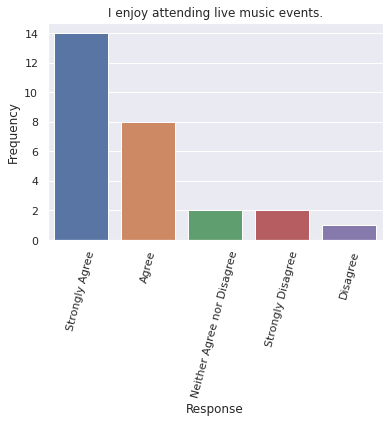

In [67]:
enjoy_music = df['enjoy_music'].value_counts()
sns.barplot(enjoy_music.index, enjoy_music.values)
plt.title('I enjoy attending live music events.')
plt.ylabel('Frequency')
plt.xlabel('Response')
#plt.xticklabels(rotation = 45)
plt.xticks(rotation = 75)
plt.show()

I need to find the error in likert_order. 'Agree' records twice and Disagree has no results.
5/30 Notes: Issue resolved